In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# import splitfolders
# splitfolders.ratio("avengers_images", output="split", seed=1337, ratio=(.8, .2), group_prefix=None)

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/val'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

80134624/80134624 [==============================] - 25s 0us/step


In [5]:
# useful for getting number of classes
folders = glob('dataset/train/*')
folders

['dataset/train\\chris_evans',
 'dataset/train\\chris_hemsworth',
 'dataset/train\\mark_ruffalo',
 'dataset/train\\robert_downey_jr',
 'dataset/train\\scarlett_johansson']

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 217 images belonging to 5 classes.
Found 57 images belonging to 5 classes.


In [10]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rohit\AppData\Local\Temp\ipykernel_5944\1138423934.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
7/7 [==============================] - 32s 5s/step - loss: 2.3173 - accuracy: 0.2857 - val_loss: 1.7246 - val_accuracy: 0.6140
Epoch 2/25
7/7 [==============================] - 29s 4s/step - loss: 1.1065 - accuracy: 0.5806 - val_loss: 0.7283 - val_accuracy: 0.7368
Epoch 3/25
7/7 [==============================] - 29s 4s/step - loss: 0.7256 - accuracy: 0.7512 - val_loss: 0.5292 - val_accuracy: 0.8772
Epoch 4/25
7/7 [==============================] - 29s 4s/step - loss: 0.4469 - accuracy: 0.8848 - val_loss: 0.5242 - val_accuracy: 0.7895
Epoch 5/25
7/7 [==============================] - 29s 4s/step - loss: 0.3835 - accuracy: 0.8802 - val_loss: 0.5109 - val_accuracy: 0.8246
Epoch 6/25
7/7 [==============================] - 29s 4s/step - loss: 0.2925 - accuracy: 0.9032 - val_loss: 0.4732 - val_accuracy: 0.8070
Epoch 7/25
7/7 [==============================] - 30s 4s/step - loss: 0.2747 - accuracy: 0.9263 - val_loss: 0.3739 - val_accuracy: 0.8596
Epoch 8/25
7/7 [==================

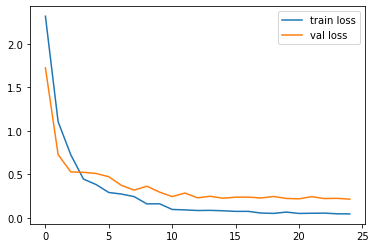

<Figure size 432x288 with 0 Axes>

In [11]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')



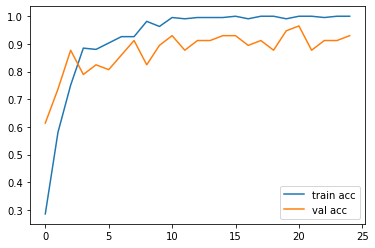

<Figure size 432x288 with 0 Axes>

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')


In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('Saved Models/facefeatures_new_model_VGG19.h5')